In [77]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/HousePrice.csv')
df.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [80]:
X = df["SquareFeet"].values[:, np.newaxis]
y = df["SalePrice"].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [82]:
#opsi 1 simpan ke dalam variabel agar lebih singkat
lr = LinearRegression()
lr.fit(X, y)
# #opsi 2
# LinearRegression().fit


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
print("Intercept :" + str(lr.intercept_))
print("Coefficient :" + str(lr.coef_))

Intercept :18569.02585648722
Coefficient :[107.13035897]


In [84]:
X_test_1 = [[1786],[1717]]

In [85]:
predict_result = lr.predict(X_test_1)

In [86]:
print(predict_result)

[209903.84696945 202511.85220081]


<function matplotlib.pyplot.show>

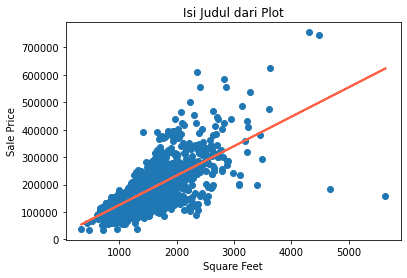

In [87]:
predict_for_xtrain = lr.predict(X)

temporary_dataframe =  pd.DataFrame({
    'x': df["SquareFeet"],
    'y': predict_for_xtrain
})

plt.scatter(df["SquareFeet"], df["SalePrice"])

plt.plot(temporary_dataframe['x'],temporary_dataframe['y'], color='tomato' ,linewidth = 2)

plt.xlabel("Square Feet")
plt.ylabel("Sale Price")

plt.title("Isi Judul dari Plot")

plt.show

Regresi Logistik

In [88]:
df2 = pd.read_csv("/content/drive/MyDrive/Dataset/US_Heart_Patients.csv")
df2.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [89]:
df2.dropna(axis=0,inplace=True)

In [90]:
df2=df2[['age','male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
column_names = df2.columns
df2.head()

,age,male,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,39,1,0.0,195.0,106.0,77.0,0
1,46,0,0.0,250.0,121.0,76.0,0
2,48,1,20.0,245.0,127.5,70.0,0
3,61,0,30.0,225.0,150.0,103.0,1
4,46,0,23.0,285.0,130.0,85.0,0


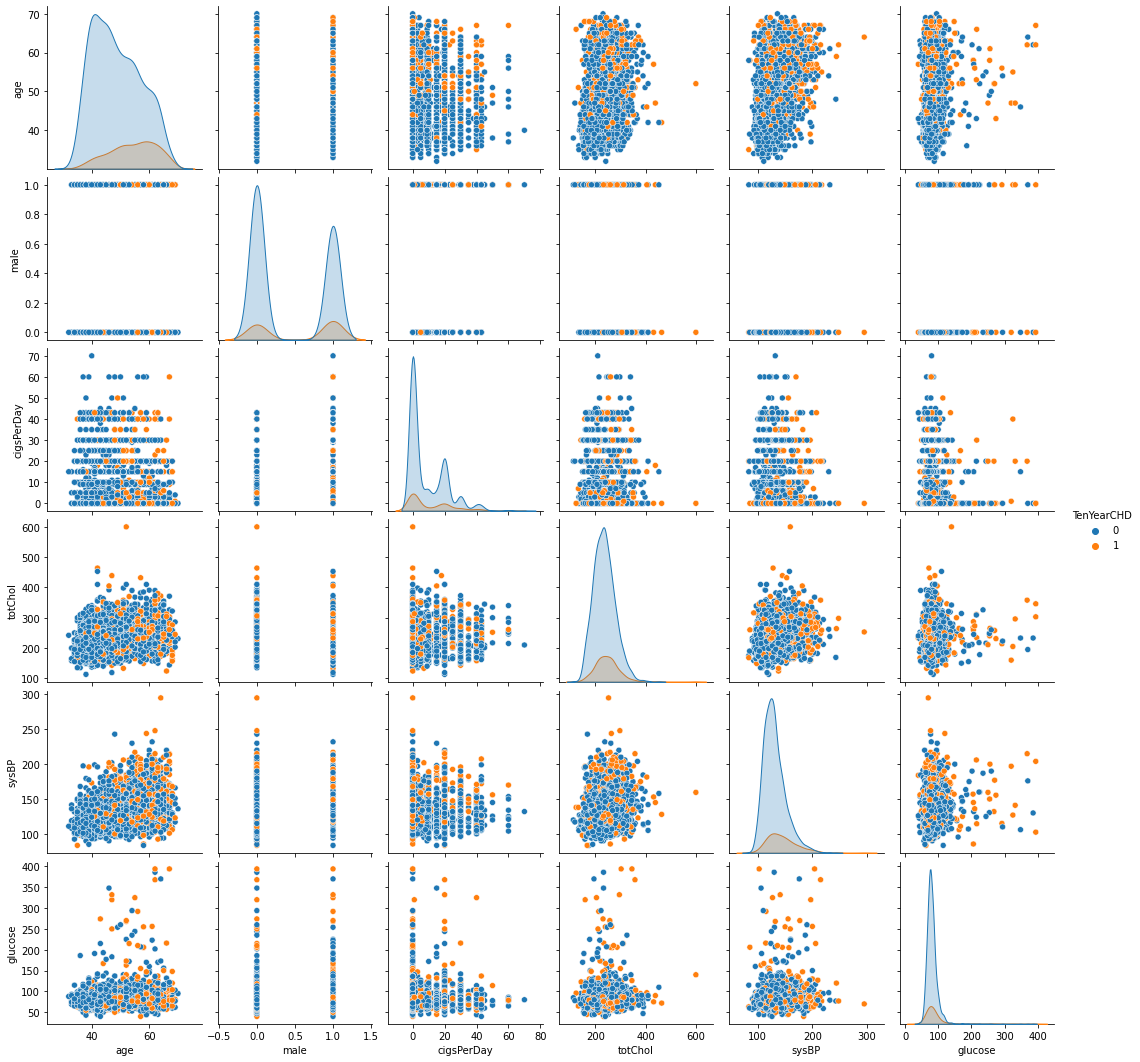

In [91]:
sns.pairplot(df2, hue='TenYearCHD')

In [92]:
X =  df2.iloc[:, :-1]
y =  df2.iloc[:, -1]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2)

In [94]:
model_lrg = LogisticRegression()

model_lrg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
print(X_test)

      age  male  cigsPerDay  totChol  sysBP  glucose
2099   50     0         0.0    243.0  157.0     78.0
3292   41     0        15.0    205.0  120.0     64.0
3145   42     0        20.0    310.0  124.0     74.0
2059   40     1         3.0    165.0  117.0     66.0
3494   60     0         0.0    259.0  155.0     95.0
...   ...   ...         ...      ...    ...      ...
16     48     1        10.0    232.0  138.0     72.0
2012   52     0         0.0    279.0  148.0     85.0
2065   54     1        30.0    255.0  149.0     65.0
4237   52     0         0.0    269.0  133.5    107.0
646    38     1         0.0    224.0  127.5     90.0

[732 rows x 6 columns]


In [96]:
X_test.reset_index(drop=True, inplace=True)

In [97]:
prd = model_lrg.predict(X_test)

In [98]:
prd_df = pd.DataFrame(prd)

In [99]:
print(prd_df)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
727  0
728  0
729  0
730  0
731  0

[732 rows x 1 columns]


In [100]:
result = pd.concat([X_test, prd_df], axis = 1, ignore_index = True)

In [101]:
result.columns = column_names
result

,age,male,cigsPerDay,totChol,sysBP,glucose,TenYearCHD
0,50,0,0.0,243.0,157.0,78.0,0
1,41,0,15.0,205.0,120.0,64.0,0
2,42,0,20.0,310.0,124.0,74.0,0
3,40,1,3.0,165.0,117.0,66.0,0
4,60,0,0.0,259.0,155.0,95.0,0
...,...,...,...,...,...,...,...
727,48,1,10.0,232.0,138.0,72.0,0
728,52,0,0.0,279.0,148.0,85.0,0
729,54,1,30.0,255.0,149.0,65.0,0
730,52,0,0.0,269.0,133.5,107.0,0


Train/Test split results:
LogisticRegression accuracy is 0.861
LogisticRegression log_loss is 0.375
LogisticRegression auc is 0.722


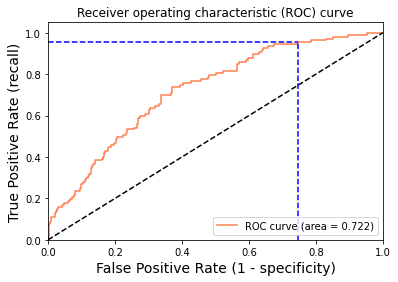

Using a threshold of 0.060 guarantees a sensitivity of 0.953 and a specificity of 0.254, i.e. a false positive rate of 74.56%.


In [102]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))
